In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# library('dplyr')

# Split, apply, combine (and arrange/sort)

## `dplyR` "verbs"

* <span style = "color:blue;"> `group_by` clump data
* <span style = "color:blue;">`summarize` 
* <span style = "color:blue;">`mutate` used to change existing colums

- `group_by`
- `summarize`
- `arrange`
- `mutate`

# What is that weird `|>`?

In [3]:
iris |> head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [5]:
iris |>
    group_by(Species) |>
    select(Sepal.Length, Species) |>
    filter(Sepal.Length > 4) |>
    summarize(mean.Sepal.Length = mean(Sepal.Length))

Species,mean.Sepal.Length
<fct>,<dbl>
setosa,5.006
versicolor,5.936
virginica,6.588


In [6]:
summarize(filter(select(group_by(iris, Species), Species, Sepal.Length), Sepal.Length > 4), mean.Sepal.Length = mean(Sepal.Length))

Species,mean.Sepal.Length
<fct>,<dbl>
setosa,5.006
versicolor,5.936
virginica,6.588


### [`|>` versus `%>%`](https://r4ds.hadley.nz/workflow-pipes.html)

<span style = "color:blue;"> The carrot percet style `%>%` is what was previously used; R now lets you use the two character pipe `|>` -- this is now preferred
    
- Chuck will post blog post about piping styles and the differences

# group_by

In [7]:
iris |> head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [23]:
iris |>
    group_by(Species) |> 
    head()

#Includes information at the top of the table "A grouped_df: 6x5"

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [9]:
iris |>
    pivot_longer(-Species) |>
    head()

Species,name,value
<fct>,<chr>,<dbl>
setosa,Sepal.Length,5.1
setosa,Sepal.Width,3.5
setosa,Petal.Length,1.4
setosa,Petal.Width,0.2
setosa,Sepal.Length,4.9
setosa,Sepal.Width,3.0


In [10]:
iris |>
    pivot_longer(-Species) |>
    #group_by(name) |>
    head()

Species,name,value
<fct>,<chr>,<dbl>
setosa,Sepal.Length,5.1
setosa,Sepal.Width,3.5
setosa,Petal.Length,1.4
setosa,Petal.Width,0.2
setosa,Sepal.Length,4.9
setosa,Sepal.Width,3.0


# summarize

In [24]:
iris |>
    summarize(median.Sepal.Length = median(Sepal.Length))

#If we have ungrouped data and send it into summarize - we'll get one summary data point back

median.Sepal.Length
<dbl>
5.8


In [32]:
iris |>
    group_by(Species) |>
    summarize(median.Sepal.Length = median(Sepal.Length), avg_sl = mean(Sepal.Length))

#If you group by `Species`, then will get back one row for each group that is created
#Calculating median speal length within each species of rows

Species,median.Sepal.Length,avg_sl
<fct>,<dbl>,<dbl>
setosa,5.0,5.006
versicolor,5.9,5.936
virginica,6.5,6.588


In [13]:
iris |> head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [14]:
# What about max Sepal.Length by Species?

iris |>
   group_by(Species) |>
   summarize(max_sepal_length = max(Sepal.Length))

Species,max_sepal_length
<fct>,<dbl>
setosa,5.8
versicolor,7.0
virginica,7.9


## group size

In [35]:
iris |>
    group_by(Species) |>
    summarize(N = n()) # also possible with count function

#count() function does similar thing; if we want to normalize values in rows - then will need to use the N = n() syntax

#Handy to use groupby to count things
#We've also done this type of exploration using geom_bar()

Species,N
<fct>,<int>
setosa,50
versicolor,50
virginica,50


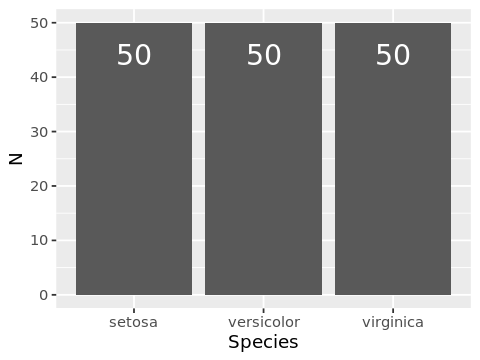

In [16]:
options(repr.plot.width = 4, repr.plot.height = 3)
df = iris |>
    group_by(Species) |>
    summarize(N = n())

ggplot(df, aes(x = Species, y = N, label = N)) +
    geom_col() + 
    geom_text(color = 'white', vjust = 2, size = 6)

In [ ]:
#when doing counts, there's a function that lets us group and count rows all at once
#that's the count function

iris |> count(Sepecies)

In [17]:
iris |>
    group_by(Species) |>
    count()

Species,n
<fct>,<int>
setosa,50
versicolor,50
virginica,50


# arrange

In [18]:
iris |>
    group_by(Species) |>
    summarize(median.Sepal.Length = median(Sepal.Length))

Species,median.Sepal.Length
<fct>,<dbl>
setosa,5.0
versicolor,5.9
virginica,6.5


In [19]:
iris |>
    group_by(Species) |>
    summarize(median.Sepal.Length = median(Sepal.Length)) |>
    arrange(median.Sepal.Length)

Species,median.Sepal.Length
<fct>,<dbl>
setosa,5.0
versicolor,5.9
virginica,6.5


In [20]:
iris |>
    group_by(Species) |>
    summarize(median.Sepal.Length = median(Sepal.Length)) |>
    arrange(desc(median.Sepal.Length))

Species,median.Sepal.Length
<fct>,<dbl>
virginica,6.5
versicolor,5.9
setosa,5.0


# mutate

In [21]:
iris |>
    mutate(p.width2length = Petal.Width / Petal.Length) |>
    head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,p.width2length
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,0.1428571
2,4.9,3.0,1.4,0.2,setosa,0.1428571
3,4.7,3.2,1.3,0.2,setosa,0.1538462
4,4.6,3.1,1.5,0.2,setosa,0.1333333
5,5.0,3.6,1.4,0.2,setosa,0.1428571
6,5.4,3.9,1.7,0.4,setosa,0.2352941


In [22]:
iris |>
    mutate(p.width2length = Petal.Width / Petal.Length) |>
    group_by(Species) |>
    summarize(max.p.width2length = max(p.width2length)) |>
    arrange(-max.p.width2length)

Species,max.p.width2length
<fct>,<dbl>
virginica,0.4705882
versicolor,0.3750000
setosa,0.3750000
